In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train=X_train/255
X_test=X_test/255

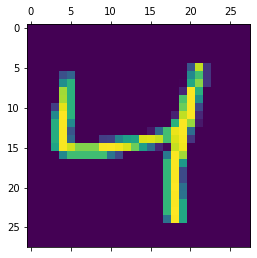

In [8]:
plt.matshow(X_train[2])

In [9]:
y_train[2]

4

In [10]:
y_train.shape

(60000,)

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened.shape

(10000, 784)

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4655 - accuracy: 0.8770
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9199
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2550 - accuracy: 0.9301
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.250

In [16]:
score=model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 958us/step - loss: 0.2649 - accuracy: 0.9279


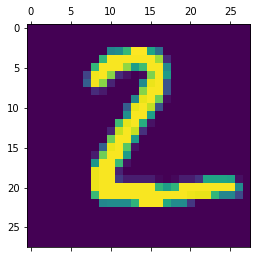

In [17]:
plt.matshow(X_test[1])

In [18]:
y_predicted=model.predict(X_test_flattened)

In [19]:
# plt.matshow(y_predicted[0])
y_predicted[1]

array([2.5103027e-01, 2.3886859e-03, 9.9966443e-01, 1.9052419e-01,
       1.0117628e-11, 8.3089840e-01, 9.0352678e-01, 1.0448415e-15,
       7.2257638e-02, 4.6953439e-12], dtype=float32)

In [20]:
np.argmax(y_predicted[1])

2

In [26]:
#now for confusion matrix we want whole values and our predicted values are the floating point values]
y_predicted_labels=[np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [28]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1107,    5,    2,    0,    1,    3,    2,   15,    0],
       [   4,    7,  931,   16,    9,    4,   10,   10,   37,    4],
       [   2,    0,   17,  931,    1,   17,    1,    9,   23,    9],
       [   2,    1,    6,    2,  921,    0,    7,    4,    8,   31],
       [  10,    2,    5,   43,   10,  767,   11,    8,   29,    7],
       [  14,    3,   11,    1,    8,   11,  907,    1,    2,    0],
       [   1,    6,   24,    8,    8,    0,    0,  939,    2,   40],
       [   7,    5,    6,   23,    9,   20,    9,    9,  876,   10],
       [  11,    7,    1,    9,   25,    4,    0,   11,    6,  935]])>

In [29]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth values')

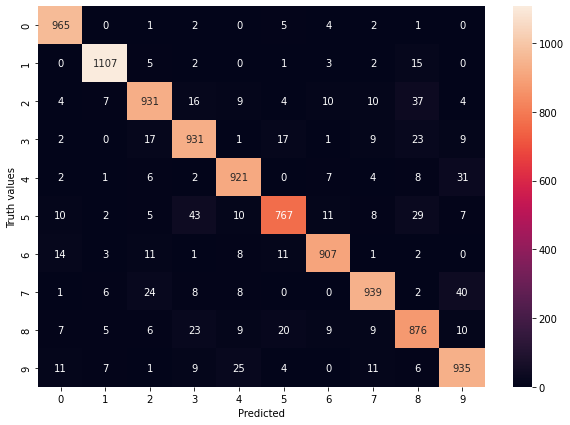

In [30]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth values')

In [32]:
#not need to flattened
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2489 - accuracy: 0.9259
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9758: 0s -
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0599 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0264 - accuracy: 0.9913
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss:

In [33]:
score=model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0899 - accuracy: 0.9783


Text(69.0, 0.5, 'Truth values')

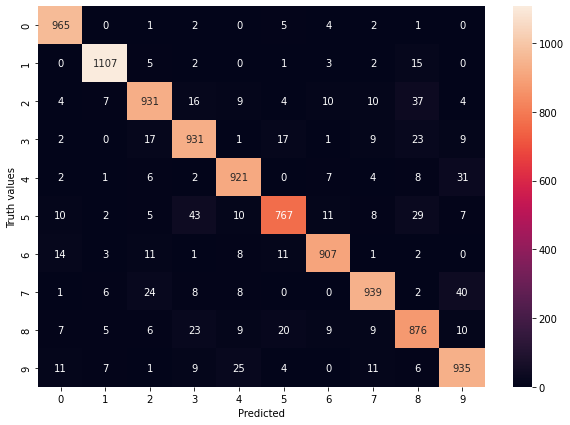

In [34]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth values')